# Day 18 - Bivariate Visualizations: Numeric to Categorical

The most common method for visualizing the relationship between a categorical and a numeric feature is a bar chart. But there are some other interesting options including strip plots, boxen plots, swarm plots, violin plots, point plots, and stacked bar charts.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/bikebuyers.csv',
                usecols = ['Education', 'Commute Distance', 'Purchased Bike', 'Age', 'Home Owner'])
df.head()

,Age,Education,Home Owner,Commute Distance,Purchased Bike
0,40,Bachelors,Yes,1-2 Miles,Yes
1,56,High School,No,1-2 Miles,Yes
2,52,Partial College,Yes,5-10 Miles,Yes
3,48,Partial College,Yes,2-5 Miles,Yes
4,43,Partial College,Yes,5-10 Miles,No


Each of these three features are categorical. But do they all need to be analyzed as categorical features? Some of them, such as Education, have an ordering. 

In [8]:
df.Education.unique()

array(['Bachelors', 'High School', 'Partial College', 'Graduate Degree',
       'Partial High School'], dtype=object)

Clearly, there is an order here where one grouping of Education is higher than another: Partial High School, High School, Partial College, Bachelors, and Graduate Degree. However, we do not have a standard linear distance between each level of education.

Even though Python will interpret Education as a categorical feature, the meaning of the text labels indicates the feature is also ordinal (i.e., ranked: 1, 2, 3, 4, and 5). What should we do?

In [9]:
# Create a new column that is a copy of Education
df['Education_rank'] = df['Education']

# Replace the values in the new column with the rank-ordered versions
df.Education_rank.replace(['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'], 
                    [1, 2, 3, 4, 5], inplace=True)

# Let Pandas know that your new feature is a number now rather than an object
df.astype({'Education_rank':'int64'})
df.head()

,Age,Education,Home Owner,Commute Distance,Purchased Bike,Education_rank
0,40,Bachelors,Yes,1-2 Miles,Yes,4
1,56,High School,No,1-2 Miles,Yes,2
2,52,Partial College,Yes,5-10 Miles,Yes,3
3,48,Partial College,Yes,2-5 Miles,Yes,3
4,43,Partial College,Yes,5-10 Miles,No,3


In [4]:
df['Commute_rank'] = df['Commute Distance']
df.Commute_rank.replace(['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'], 
                    [0, 1, 2, 5, 10], inplace=True)
df.astype({'Commute_rank':'int64'})
df.head()

,Age,Education,Home Owner,Commute Distance,Purchased Bike,Education_rank,Commute_rank
0,40,Bachelors,Yes,1-2 Miles,Yes,4,1
1,56,High School,No,1-2 Miles,Yes,2,1
2,52,Partial College,Yes,5-10 Miles,Yes,3,5
3,48,Partial College,Yes,2-5 Miles,Yes,3,2
4,43,Partial College,Yes,5-10 Miles,No,3,5


In [11]:
df['Purchased Bike'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['Purchased Bike'].astype('int64') # Notice that we can reference just the column, and then we only need to specify the data type
df.head()

,Age,Education,Home Owner,Commute Distance,Purchased Bike,Education_rank
0,40,Bachelors,Yes,1-2 Miles,1,4
1,56,High School,No,1-2 Miles,1,2
2,52,Partial College,Yes,5-10 Miles,1,3
3,48,Partial College,Yes,2-5 Miles,1,3
4,43,Partial College,Yes,5-10 Miles,0,3


#### Seaborn Barplot

Now that we have manipulated our data into appropriate data types. Let's do some visualizations.

<Axes: xlabel='Education', ylabel='Purchased Bike'>

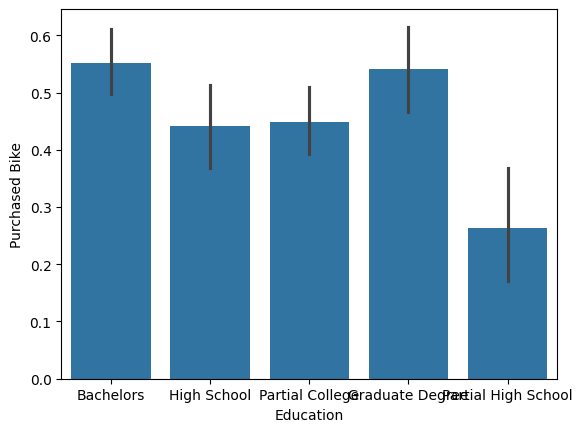

In [12]:
import seaborn as sns

sns.barplot(df, x = 'Education', y = 'Purchased Bike')

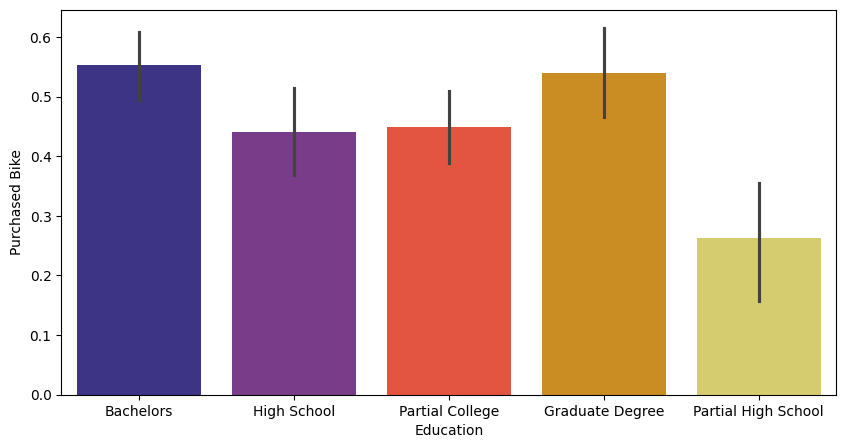

In [19]:
## Remove overlapping labels

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(df, x = 'Education', y = 'Purchased Bike', hue = 'Education', palette = 'CMRmap');

C:\Users\skous2\AppData\Local\Temp\ipykernel_49676\2779927762.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz.set_xticklabels(viz.get_xticklabels(), rotation=25);


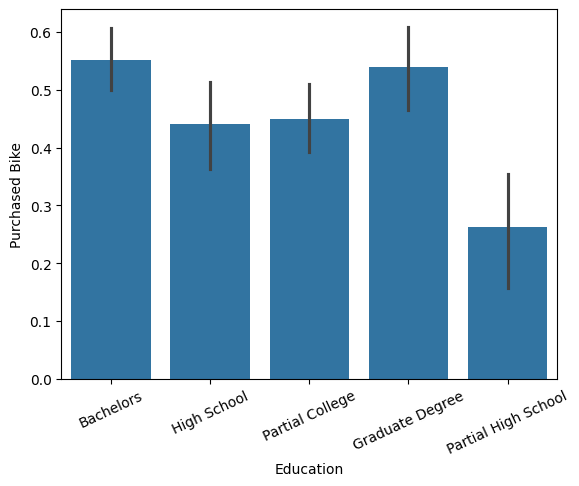

In [24]:
##Rotate the axis

viz = sns.barplot(df, x = 'Education', y = 'Purchased Bike');
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

The vertical black tick marks on each bar are called error bars, and they represent the standard error of the mean (SEM)

What if we want to order the bars by theoretical rank but keep the actual text labels? We can do that one way by using the Education_rank column we created in prior steps:

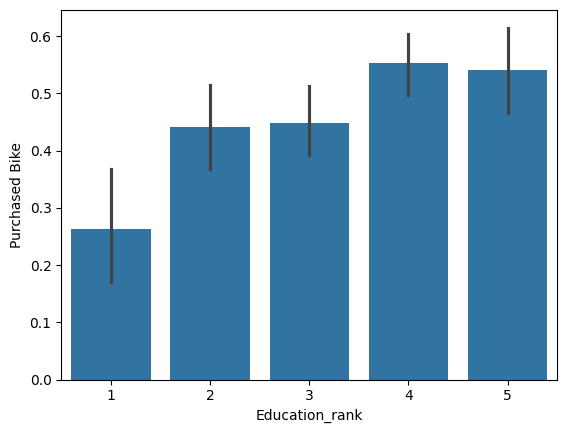

In [28]:
viz = sns.barplot(x="Education_rank", y="Purchased Bike", data=df);

C:\Users\skous2\AppData\Local\Temp\ipykernel_49676\954449125.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz.set_xticklabels(viz.get_xticklabels(), rotation=25);


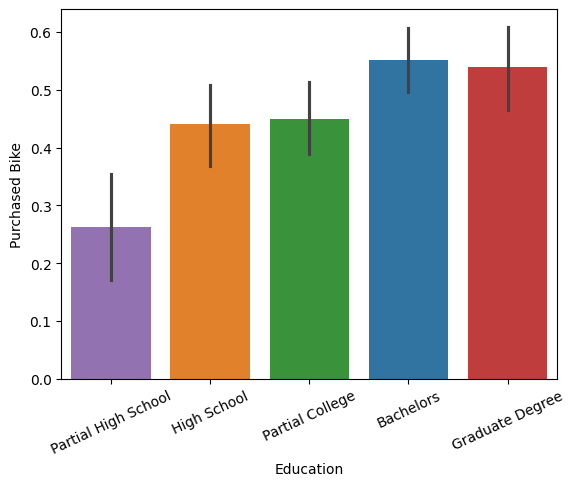

In [32]:
viz = sns.barplot(x="Education", y="Purchased Bike", data=df, hue = 'Education',
                    order=['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

What about the median instead of the mean? Let's try it.

C:\Users\skous2\AppData\Local\Temp\ipykernel_49676\1526790256.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz.set_xticklabels(viz.get_xticklabels(), rotation=25);


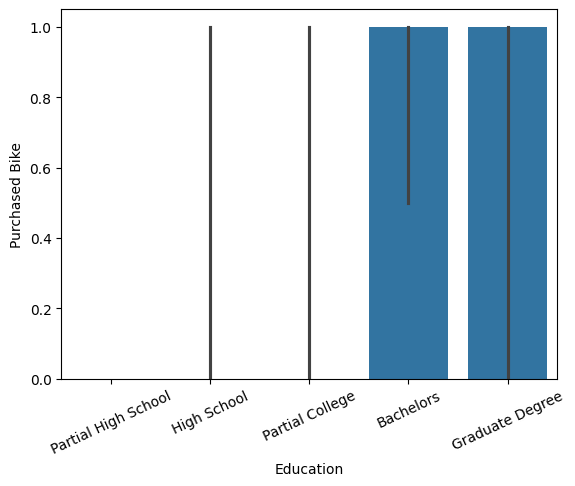

In [41]:
from numpy import median

viz = sns.barplot(x="Education", y="Purchased Bike", data=df, 
                    order=['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
                    estimator='median');
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

C:\Users\skous2\AppData\Local\Temp\ipykernel_49676\2513268563.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz.set_xticklabels(viz.get_xticklabels(), rotation=25);


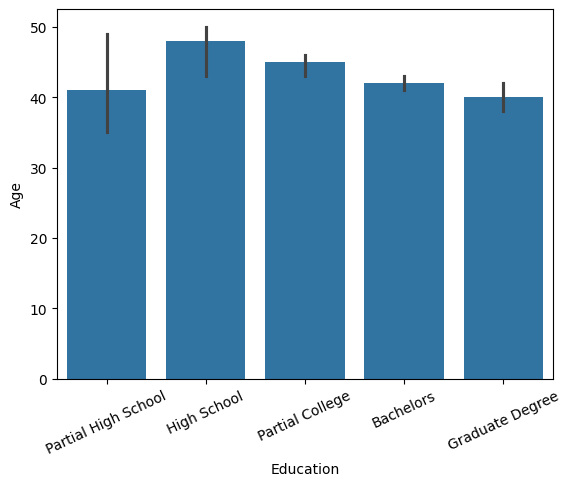

In [42]:
viz = sns.barplot(x="Education", y="Age", data=df, 
                    order=['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
                    estimator='median');
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

###Age has a richer range of values.

#### Three or more features

Let’s continue exploring the relationship between education and age. But this time, let’s include whether or not they purchased a bike by creating the same bars separately for those who did versus did not purchase a bike (using hue):

C:\Users\skous2\AppData\Local\Temp\ipykernel_49676\399537739.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz.set_xticklabels(viz.get_xticklabels(), rotation=25);


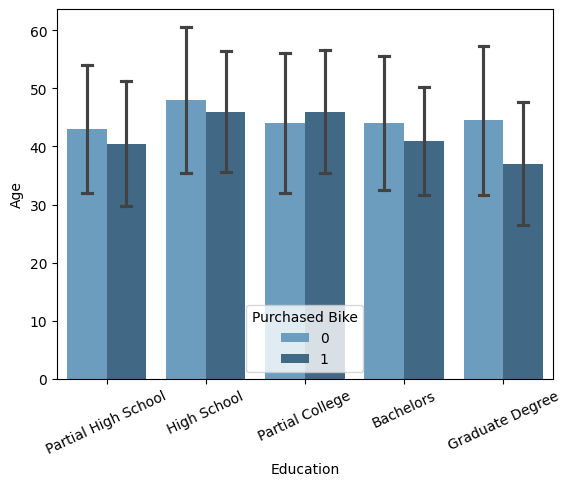

In [45]:
viz = sns.barplot(x="Education", y="Age", hue="Purchased Bike", data=df, 
                  order=['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
                  estimator=median, errorbar="sd", capsize=.2, palette="Blues_d");
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

We can add another feature (Home Owner) by creating separate charts on the same grid and adding the label to the col="" parameter. To do this in Seaborn, we will use the catplot() object, which underlies the barplot(). Doing this allows us to combine a barplot with the FacetGrid object, which combines multiple plots to a grid structure.

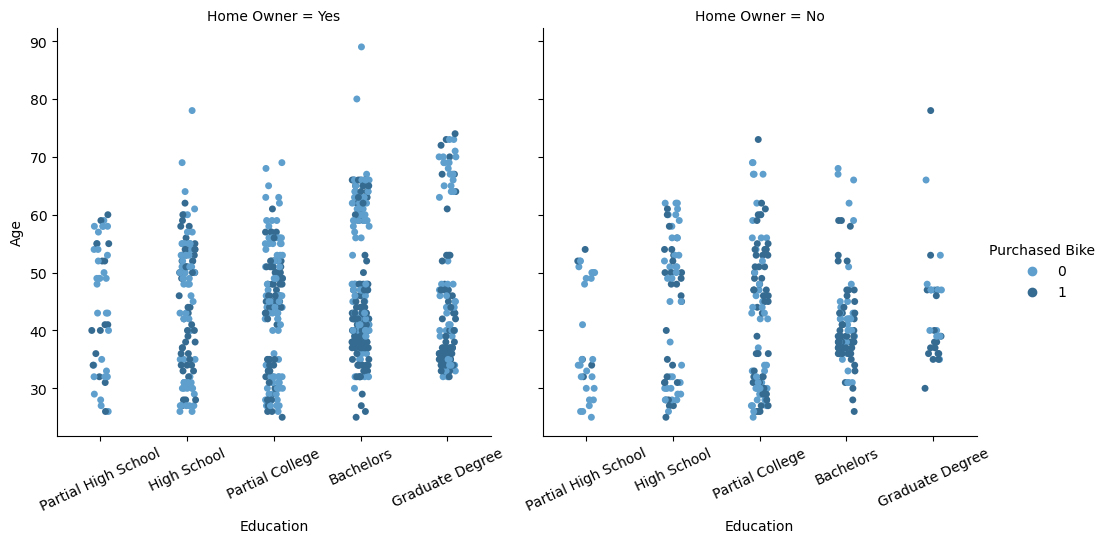

In [15]:
viz = sns.catplot(x="Education", y="Age", hue="Purchased Bike", col="Home Owner", data=df, 
            order=['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
            estimator=median, errorbar="sd", palette="Blues_d");
viz.set_xticklabels(rotation=25);

You can change the type of plot using the kind ="" option

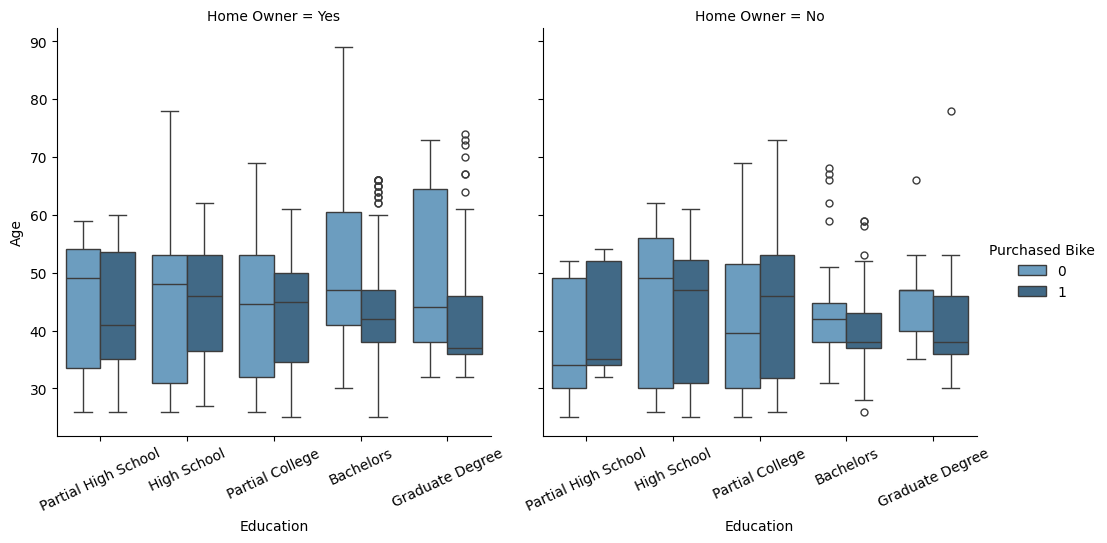

In [46]:
viz = sns.catplot(x="Education", y="Age", hue="Purchased Bike", col="Home Owner", data=df, 
            order=['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
            estimator=median, errorbar="sd", palette="Blues_d", kind="box"); #box plot
viz.set_xticklabels(rotation=25);

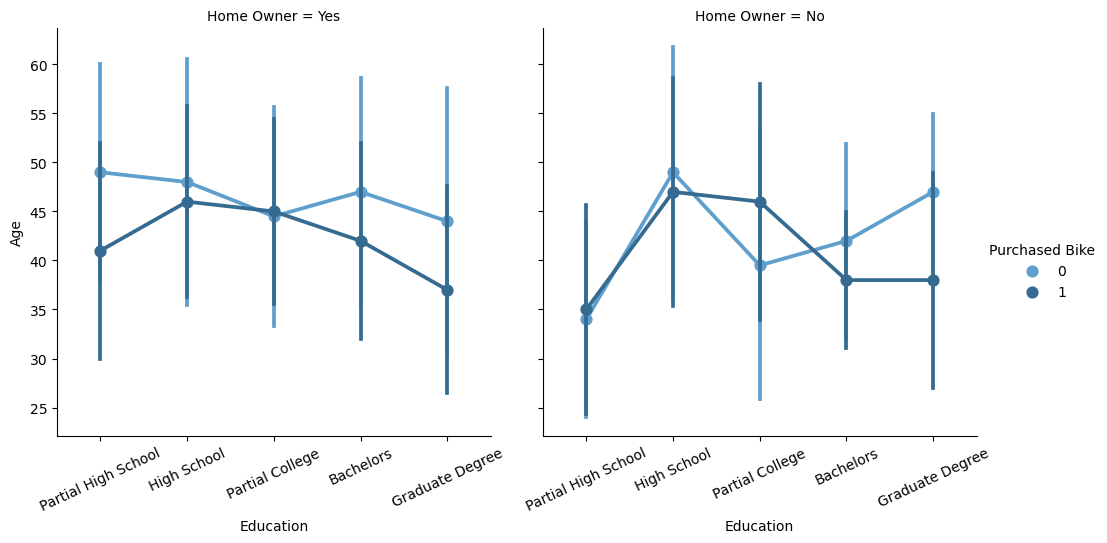

In [20]:
viz = sns.catplot(x="Education", y="Age", hue="Purchased Bike", col="Home Owner", data=df, 
            order=['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
            estimator=median, errorbar="sd", palette="Blues_d", kind="point"); #point plot
viz.set_xticklabels(rotation=25);